# sympy!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import sympy

In [2]:
#seems optional; can make some of the output look better
sympy.init_printing(use_unicode=True)

From the [SymPy webpage](https://www.sympy.org/en/index.html):


> SymPy is a Python library for symbolic mathematics. It aims to become a full-featured computer algebra system (CAS) while keeping the code as simple as possible in order to be comprehensible and easily extensible. SymPy is written entirely in Python.

From the TAMU [Math page](https://www.math.tamu.edu/courses/math151/):
>### MATH 151 - Engineering Mathematics I - Fall 2021
>##### Credits 4. 3 Lecture Hours. 2 Lab Hours.
>
>(MATH 2413) Engineering Mathematics I. Rectangular coordinates, vectors, analytic geometry, functions, limits, derivatives of functions, applications, integration, computer algebra. MATH 171 designed to be a more demanding version of this course. Only one of the following will satisfy the requirements for a degree: MATH 131, MATH 142, MATH 147, MATH 151 and MATH 171.  
>**Prerequisite**: MATH 150 or equivalent or acceptable score on TAMU Math Placement Exam; also taught at Galveston and Qatar campuses.

There are some helpful documents on the pages for that course. Take a look at these documents to familiarize yourself with what is going to covered and **how** they do it.


Here is a lab example from the course: https://www.math.tamu.edu/courses/math151/Python/Math151Lab1b.pdf

In [3]:
s0 = 400
v0 = -16
t = 4
"st = (g/2)t^2 + v0t + s0"
g = -32

st = (g/2) * (t**2) + v0*t + s0


In [4]:
print(st)

80.0


### Make it a function
We're going to create a function that will save us from having to type in the formula each time. <br>
*Note: if our equation/formula changes, we will have to redo the function too*

In [5]:
def question1(s0, v0, t, g=-32):
    """Calculate the height of the ball"""
    st = (g/2) * (t**2) + v0*t + s0
    return st

Now we can test out our function by calling it with different values

In [6]:
question1(400, -16, 4)

In [7]:
question1(10, 400, 25)

### Importing the entire package
The sympy documentation and the MATH 151 Lab worksheet both demonstrate importing the entire package into the current namespace. If this is one of the only packages you'll be using, it will work just fine. However, if you are using multiple packages and import them all into here like below, you *could* end up clobbering, or overwriting, a different function with the same name.

That sounds scary but nothing is permanent. If that happens, just restart the Python kernel. 

In [8]:
from sympy import *

The above method of importing is generally frowned upon by the Python community. While it is a valid line, it can overwrite functions/classes if two packages use the same name for a function. 

### Creating symbols
sympy uses symbols (hence the name....)

Before we can use these symbols we have to create them first. We can call our symbols anything we want but it's usually best to stick with simple, obvious names. 

In [29]:
x = symbols('x')

So let's call ours what the assignment calls them

In [30]:
s0 = symbols('s0')
v0 = symbols('v0')
g = symbols('g')
t = symbols('t')

We can also accomplish the above line in one single line:

In [31]:
s0, v0, g, t = symbols('s0 v0 g t')

Now let's see what that did

In [32]:
s0 + v0 + 10  # 'fake' equation just to see the symbols

Notice how the output above looks a little different than the one below here

In [33]:
print(s0 + v0+10)

s0 + v0 + 10


Using the print statement removes any formatting that sympy has applied to the symbol objects we created. 

### Creating equations/formulas
Let's use those symbols to create our equation from above. Sympy calls these expressions but I'll call them equations/formulas here.

In [34]:
height = ((g/2) * t**2) + v0*t + s0

In [35]:
height

This looks a little different from the equation on our sheet right? Is this one wrong? 

No, it turns out that sympy took it upon itself to 'simplify' the equation and move *t<sup>2</sup>* to be with *g*

### Using the equation
Now we want to input values for the different variables in that equation and obtain a result.

To do this, we use the subs method

In [36]:
height.subs([(s0, 400), [v0, -16], [t,4], [g, -32]])

Important to note that our original equation is unmodified. The substitution that we did was temporary. 

In [37]:
height # remains unmodified

In [38]:
# now with different values
height.subs([(s0, 10), [v0, 400], [t,25], [g, -32]])

We can also use loops to input values so that we don't need to manually type everything in, every single time we want to change the values. 

In [39]:
# create a list of lists with values for each variable
values = [
    [400, -16, 4, -32],
    [10, 400, 25, -32]
]

In [40]:
for inputs in values:
    answer = height.subs([(s0, inputs[0]), [v0, inputs[1]], [t,inputs[2]], [g, inputs[3]]])
    print(answer)

80
10


We can use list comprehensions to complete the same process. List comprehensions can sometimes be faster and clearer (and sometimes NOT!)

In [41]:
[height.subs([(s0, inputs[0]), [v0, inputs[1]], [t,inputs[2]], [g, inputs[3]]]) 
for inputs in values]

While the above line works and displays the results, it does **not** save the results and so we cannot do anything with them later. To *save* the results, we need to catch the returned results. 

In [42]:
answers = [height.subs([(s0, inputs[0]), [v0, inputs[1]], [t,inputs[2]], [g, inputs[3]]]) 
for inputs in values]

In [43]:
answers

In [44]:
# get the first answer
answers[0]

What about the next function? 

sin(e<sup>x</sup>)

Let's try a different way to 'encode' our equation without typing it out explicitly using symbols. 

To do this we'll use the sympify function (get it?) 

<code> sympy.sympify('my_equation') </code>

In [45]:
function = sympy.sympify('x+1')

In [46]:
function

Great! Now let's code in our next one

In [47]:
function = sympy.sympify('sin(e**x)')

In [48]:
function

Looks right. Let's try it:

In [49]:
a = (0, function.subs(x, 0).evalf())

In [50]:
a

That worked. Let's try another number for x

In [51]:
# this way may sometimes not work with multiple variables
b = (1, function.subs(x,1).evalf())
print(b)

(1, sin(e))


What happened here? Why didn't it work?

It turns out that when we typed `e` into our equation, it was interpreted as being a variable (symbol) called e. The code has no idea that `e` has a special meaning. 

How do fix this? Use the exponential function instead

In [52]:
function = sympy.sympify('sin(exp(x))')
function

Though it looks the same, it's 'different' under the hood. 

Let's try our substitution from earlier

In [53]:
# this way may sometimes not work with multiple variables
b = (1, function.subs(x,1).evalf())
print(b)

(1, 0.410781290502909)


What's that `.evalf()` bit?

Sometimes you will need to tell sympy to run the calculation. 

It doesn't 'complete' the calculation of sin(x) because it will output a floating point (decimal) number that is cutoff, and therefore not *exactly* equal sin(x). To avoid this, sympy maintains it as sin(x) unless we tell it to evaluate it. 

If we just substituted it as we did earlier:

In [54]:
function.subs(x,1)

We still have e in our result. To get a number we have to evaluate the function:

In [55]:
# this way may sometimes not work with multiple variables
b = (1, function.subs(x,1).evalf())
print(b)

(1, 0.410781290502909)


In [56]:
# sympy documentation says this is the way to structure it
b = (1, function.evalf(subs={'x':1}))
print(b)

(1, 0.410781290502909)


What if you have multiple variables? That curly bracket in the `subs=` part is a dictionary. We can continue to add values for different variables. 

In [57]:
big_eq = sympy.sympify('sin(a)+b+c')
big_eq

In [58]:
big_eq.subs([(a,1),(b,2),(c,3)])

NameError: name 'c' is not defined

What happened here? Turns out we never defined a, b, and c to be symbols. I honestly thought the sympify function did that for use behind the scenes...

We can just use strings instead:

In [59]:
big_eq.subs([('a',1),('b',2),('c',3)])

But notice how it maintains the result as sin(1) instead of a decimal number? That's where evalf comes in.

In [60]:
big_eq.evalf(subs={'a':1,'b':2,'c':3})

Plus it looks a little cleaner. We could even make it easier on our eyes by doing this equivalent thing:

In [61]:
big_eq.evalf(subs={'a':1,
                   'b':2,
                   'c':3 })

More examples:

In [62]:
b = (1, function.evalf(subs={x:sympy.log(sympy.pi/2.)}))
print(b)

(1, 1.00000000000000)


In [63]:
sympy.log(100,10) #note this function uses the natural log by default

### Plotting
We can also plot functions using sympy and it ends up being easier to do and nicer looking without much effort. 

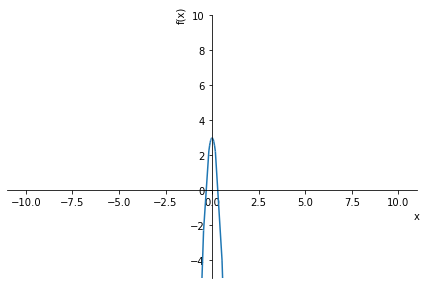

In [64]:
sympy.plot(sympy.sympify('x**3-25*x**2+3'), (x, -10, 10), ylim=(-5,10))

In [65]:
made_up = x**3-25*x**2+3

In [66]:
made_up

In [67]:
made_up.subs(x, 0)

Let's go through a list of x values to obtain the y values and then we can plot those. 
The `range()` function below will create our list of values for us. 

In [68]:
output = []
for value in range(-10, 11):
    output.append(made_up.subs(x, value))

In [69]:
print(output
    )

[-3497, -2751, -2109, -1565, -1113, -747, -461, -249, -105, -23, 3, -21, -89, -195, -333, -497, -681, -879, -1085, -1293, -1497]


In [70]:
# same thing but in a list comprehension instead
output = [made_up.subs(x, value) for value in range(-10, 11)]

In [71]:
print(output) #output should be the same

[-3497, -2751, -2109, -1565, -1113, -747, -461, -249, -105, -23, 3, -21, -89, -195, -333, -497, -681, -879, -1085, -1293, -1497]


Now we can plot it

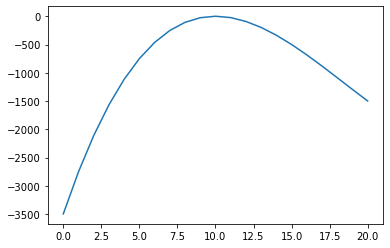

In [72]:
plt.plot(output)

Why doesn't it look the same? 

1. We didn't provide any x values so it added its own
2. We didn't give it any kind of boundaries so it plotted what it needed to

We can make it look similar.

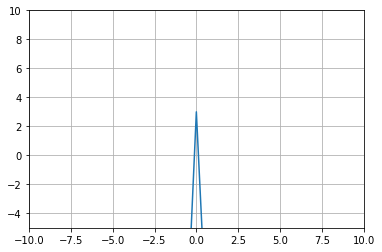

In [73]:
plt.plot(range(-10, 11), output) 
plt.xlim(-10, 10)
plt.ylim(-5,10)
plt.grid()

But it's not exactly the same. We could go through the process of trying to recreate it OR we can simply use what sympy has provided. 

Another reason to use the sympy version, it evaluates at more x values. What do I mean?

Look closely:

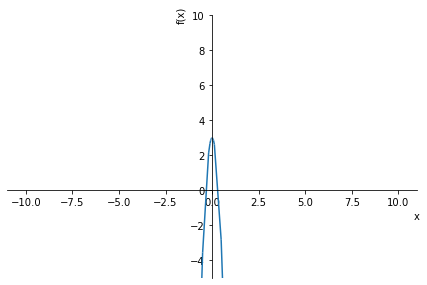

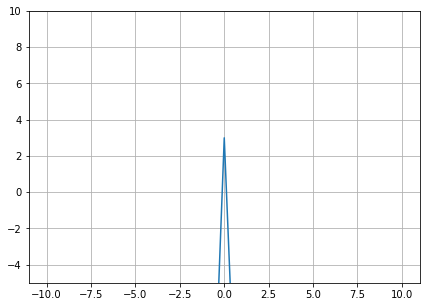

In [74]:
# sympy
sympy.plot(sympy.sympify('x**3-25*x**2+3'), (x, -10, 10), ylim=(-5,10))

#ours
plt.figure(figsize=(7,5))
plt.plot(range(-10, 11), output) 
plt.xlim(-11, 11)
plt.xticks(np.arange(-10, 11, 2.5))
plt.ylim(-5,10)
plt.grid()

Now zoom in near 3

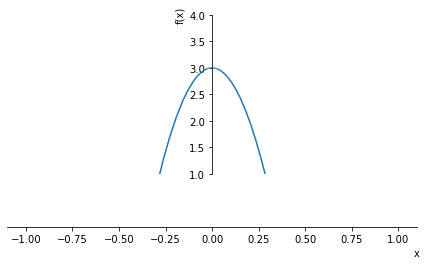

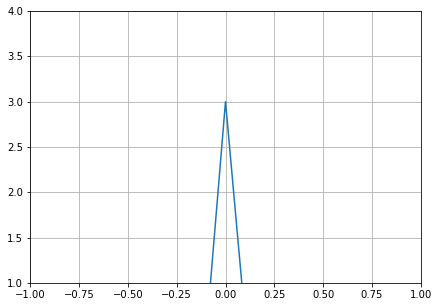

In [75]:
# sympy
sympy.plot(sympy.sympify('x**3-25*x**2+3'), (x, -1, 1), ylim=(1,4))

#ours
plt.figure(figsize=(7,5))
plt.plot(range(-10, 11), output) 
plt.xlim(-1, 1)
plt.ylim(1,4)
plt.grid()

Notice how our data are 'pointed' and not a nice smooth curve? It's because we only evaluated our function at integer values. 

### Expanding and factoring

In [76]:
sympy.factor(made_up)

In [77]:
test2 = (x+3)*(x**2-4)

In [78]:
test2

In [79]:
test2_expanded = sympy.expand(test2)
test2_expanded

In [80]:
sympy.factor(test2_expanded)

### Points and Lines
Create a couple of instances of points

In [81]:
p = sympy.Point(4,-2)
q = sympy.Point(-1,3)

Now let's create a line from those two points

In [82]:
l = sympy.Line(p, q)

And now we can get things from this line:

In [83]:
l.slope

How about angles between lines?

In [84]:
p = sympy.Point(1,0)
q = sympy.Point(0,1)

origin = sympy.Point(0,0)


In [85]:
first = sympy.Line(origin, p)
second = sympy.Line(origin, q)

In [86]:
first.slope

In [87]:
second.slope

Angle between our two lines

In [88]:
first.angle_between(second)

Output is in radians, let's convert to degrees

In [89]:
float(first.angle_between(second))

In [90]:
np.rad2deg(float(first.angle_between(second)))